# **Food Vision** 🍔 

This is an **end-to-end CNN Image Classification Model** which identifies the food in your image.

I worked out with a pretrained Image Classification Model (**EfficientNetB1**) that comes with Keras and then retrained it on the infamous **Food101 Dataset**.


> **Dataset :** `Food101`

> **Model :** `EfficientNetB1`





## **Setting up the Workspace**

* Checking the GPU
* Importing Tensorflow
* Importing other required Packages

### **Checking the GPU**

For this Project we will working with **Mixed Precision**. And mixed precision works best with a with a GPU with compatibility capacity **7.0+**.

At the time of making this model my GPU is **RTX 3050 4GBvRam** with **75W TPU**

You can use **Google Colab** as well.
Make sure to change the runtime type to either:
* T4 GPU
* A100 GPU
* L4 GPU
* v2-8 TPU

Run the below cell to see which GPU is allocated to you.

In [1]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 3050 Laptop GPU (UUID: GPU-44093b30-bdf3-5ae0-00d8-cccd0bde85ea)


### **Importing Tensorflow**

For this project I am using TensorFlow 2.16.2 which compartible with my GPU and it's CUDA and cuDNN version.

You can use latest/older versions as well.

Make sure your CUDA and cuDNN supports the TensorFlow version you are using.

In [2]:
import tensorflow as tf
print(tf.__version__)

2025-07-26 14:59:30.183661: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-26 14:59:30.266883: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-26 14:59:30.267100: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-26 14:59:30.350860: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-26 14:59:31.312412: W tensorflow/compiler/tf

2.16.2


### **Importing other required Packages**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import tensorflow_datasets as tfds
import seaborn as sn

#### **Importing `helper_fuctions`**

The `helper_functions.py` is a python script created by me. Which has some important functions I use frequently while building Deep Learning Models.

In [4]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py



7[Files: 0  Bytes: 0  [0 B/s] Re]87[https://raw.githubusercontent.]87Saving 'helper_functions.py'
87helper_functions.py  100% [=============================>]    3.48K    --.-KB/s87HTTP response 200  [https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py]
87helper_functions.py  100% [=============================>]    3.48K    --.-KB/s87[Files: 1  Bytes: 3.48K [5.13KB]8

In [5]:
from helper_functions import plot_loss_curves, load_and_prep_image

## **Getting the Data Ready**

The Dataset used is **Food101**, which is available on both Kaggle and Tensorflow. 

In the below cells we will be importing Datasets from `Tensorflow Datasets` Module.


In [6]:
# Prints list of Datasets avaible in Tensorflow Datasets Module

dataset_list = tfds.list_builders()
dataset_list[:10]

2025-07-26 14:59:36.331106: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews']

### **Importing Food101 Dataset**

**Disclaimer :** 
The below cell will take time to run, as it will be downloading (I had it already downloaded :) thats why it didn't took me anytime)

**4.65GB data** from **Tensorflow Datasets Module**. 

So do check if you have enough **Disk Space** and **Bandwidth Cap** to run the below cell.

In [7]:
(train_data, test_data), ds_info = tfds.load(name='food101',
                                             split=['train', 'validation'],
                                             shuffle_files=False,
                                             as_supervised=True,
                                             with_info=True)

2025-07-26 14:59:40.868349: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-26 14:59:41.072624: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-26 14:59:41.072887: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

## **Becoming One with the Data**

One of the most important steps in building any ML or DL Model is to **become one with the data**. 

Once you get the gist of what type of data your dealing with and how it is structured, everything else will fall in place.

In [8]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [9]:
class_names = ds_info.features['label'].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [10]:
train_one_sample = train_data.take(1)

In [11]:
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [12]:
for image, label in train_one_sample:
  print(f"""
  Image Shape : {image.shape}
  Image Datatype : {image.dtype}
  Class : {class_names[label.numpy()]}
  """)


  Image Shape : (512, 512, 3)
  Image Datatype : <dtype: 'uint8'>
  Class : huevos_rancheros
  


2025-07-26 14:59:41.738296: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [13]:
image[:2]

<tf.Tensor: shape=(2, 512, 3), dtype=uint8, numpy=
array([[[233, 253, 251],
        [231, 253, 250],
        [228, 254, 251],
        ...,
        [ 85,  82,  89],
        [ 68,  67,  75],
        [ 57,  57,  67]],

       [[232, 254, 252],
        [229, 254, 251],
        [226, 255, 251],
        ...,
        [121, 116, 120],
        [100,  99, 104],
        [ 86,  85,  91]]], dtype=uint8)>

In [14]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

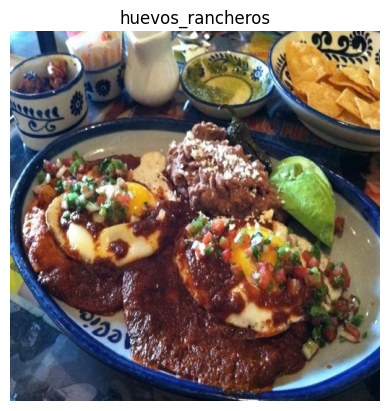

In [15]:
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

## **Preprocessing the Data**

Since we've downloaded the data from TensorFlow Datasets, there are a couple of preprocessing steps we have to take before it's ready to model. 

More specifically, our data is currently:

* In `uint8` data type
* Comprised of all differnet sized tensors (different sized images)
* Not scaled (the pixel values are between 0 & 255)

Whereas, models like data to be:

* In `float32` data type
* Have all of the same size tensors (batches require all tensors have the same shape, e.g. `(224, 224, 3)`)
* Scaled (values between 0 & 1), also called normalized

To take care of these, we'll create a `preprocess_img()` function which:

* Resizes an input image tensor to a specified size using [`tf.image.resize()`](https://www.tensorflow.org/api_docs/python/tf/image/resize)
* Converts an input image tensor's current datatype to `tf.float32` using [`tf.cast()`](https://www.tensorflow.org/api_docs/python/tf/cast)

In [16]:
def preprocess_img(image, label, img_size=224):
  image = tf.image.resize(image, [img_size, img_size])
  image = tf.cast(image, tf.float32)
  return image, label

In [17]:
# Trying the preprocess function on a single image

preprocessed_img = preprocess_img(image, label)[0]
preprocessed_img

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[230.65816  , 253.64285  , 251.       ],
        [222.99998  , 254.97449  , 252.19388  ],
        [207.06633  , 255.       , 250.36734  ],
        ...,
        [140.66287  , 129.52519  , 121.22428  ],
        [121.14268  , 115.26515  , 116.95397  ],
        [ 83.95363  ,  83.08119  ,  89.63737  ]],

       [[221.47449  , 254.37755  , 253.33163  ],
        [214.5102   , 255.       , 253.92348  ],
        [198.41327  , 254.58673  , 251.96939  ],
        ...,
        [208.66318  , 195.82143  , 173.40823  ],
        [197.03056  , 190.1071   , 174.83162  ],
        [175.54036  , 171.6169   , 161.21384  ]],

       [[204.21428  , 253.42857  , 249.57143  ],
        [198.71428  , 254.64287  , 251.2449   ],
        [185.04591  , 251.73979  , 252.21428  ],
        ...,
        [222.45403  , 207.47444  , 169.35715  ],
        [216.52551  , 205.01024  , 172.02556  ],
        [215.51529  , 207.87244  , 177.58672  ]],

       ...,

     

In [18]:
# I am using batch size as 32

train_data = train_data.map(preprocess_img, tf.data.AUTOTUNE)
train_data = train_data.shuffle(buffer_size=1000).batch(32).prefetch(tf.data.AUTOTUNE)

test_data = test_data.map(preprocess_img, tf.data.AUTOTUNE)
test_data = test_data.batch(32)

In [19]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [20]:
test_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

## **Building the Model : EfficientNetB1**


### **Getting the Callbacks ready**
As we are dealing with a complex Neural Network (EfficientNetB0) its a good practice to have few call backs set up. Few callbacks I will be using throughtout this Notebook are :
 * **TensorBoard Callback :** TensorBoard provides the visualization and tooling needed for machine learning experimentation

 * **EarlyStoppingCallback :** Used to stop training when a monitored metric has stopped improving.
 
 * **ReduceLROnPlateau :** Reduce learning rate when a metric has stopped improving.


 We already have **TensorBoardCallBack** function setup in out helper function, all we have to do is get other callbacks ready.

In [21]:
from helper_functions import create_tensorboard_callback

In [22]:
# EarlyStopping Callback

early_stopping_callback = tf.keras.callbacks.EarlyStopping(restore_best_weights=True, patience=3, verbose=1, monitor="val_accuracy")

In [23]:
# ReduceLROnPlateau Callback

lower_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2,
                                                monitor='val_accuracy',
                                                min_lr=1e-7,
                                                patience=0,
                                                verbose=1)



### **Building the Model**

In [24]:
import tensorflow as tf
from tensorflow.keras import layers

input_shape = (224, 224, 3)

# Input and Data Augmentation
inputs = layers.Input(shape=input_shape, name="input_layer")

# Base model
base_model = tf.keras.applications.EfficientNetB1(
    include_top=False,
    input_tensor=inputs,
    weights="imagenet"
)
base_model.trainable = False  # Optional: freeze base

x = base_model.output
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dropout(0.3)(x)

# Replace `class_names` with the actual number of classes
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax")(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


In [25]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 6,704,620 (25.58 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 6,575,239 (25.08 MB)

In [26]:
history = model.fit(train_data,
                    epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.25 * len(test_data)),
                    callbacks=[create_tensorboard_callback("training-logs", "EfficientNetB1-"),
                               early_stopping_callback,
                               lower_lr])

Saving TensorBoard log files to: training-logs/EfficientNetB1-/20250726-150001
Epoch 1/10


I0000 00:00:1753522210.930548   20398 service.cc:145] XLA service 0x7ff2c8115db0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753522210.930579   20398 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-07-26 15:00:11.308476: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-07-26 15:00:12.934187: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:1753522225.820649   21023 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_15868', 540 bytes spill stores, 540 bytes spill loads

I0000 00:00:1753522225.844290   21026 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_15868', 544 bytes spill stores, 544 bytes spill 

   1/2368 ━━━━━━━━━━━━━━━━━━━━ 27:04:34 41s/step - accuracy: 0.0000e+00 - loss: 4.7771

I0000 00:00:1753522242.898663   20398 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2367/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4332 - loss: 2.4162

I0000 00:00:1753522400.514478   23416 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_15868', 512 bytes spill stores, 512 bytes spill loads

I0000 00:00:1753522400.589121   23414 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_15868', 516 bytes spill stores, 516 bytes spill loads



2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4332 - loss: 2.4160

I0000 00:00:1753522417.076551   23813 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_2874', 128 bytes spill stores, 128 bytes spill loads

I0000 00:00:1753522417.209055   23818 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_2874', 340 bytes spill stores, 340 bytes spill loads



2368/2368 ━━━━━━━━━━━━━━━━━━━━ 229s 79ms/step - accuracy: 0.4333 - loss: 2.4158 - val_accuracy: 0.6823 - val_loss: 1.1901 - learning_rate: 0.0010
Epoch 2/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 156s 66ms/step - accuracy: 0.6194 - loss: 1.4737 - val_accuracy: 0.6978 - val_loss: 1.1009 - learning_rate: 0.0010
Epoch 3/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 156s 66ms/step - accuracy: 0.6412 - loss: 1.3761 - val_accuracy: 0.7113 - val_loss: 1.0518 - learning_rate: 0.0010
Epoch 4/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 164s 69ms/step - accuracy: 0.6518 - loss: 1.3206 - val_accuracy: 0.7192 - val_loss: 1.0311 - learning_rate: 0.0010
Epoch 5/10
2367/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6596 - loss: 1.2938
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 157s 66ms/step - accuracy: 0.6596 - loss: 1.2938 - val_accuracy: 0.7167 - val_loss: 1.0198 - learning_rate: 0.0010
Epoch 6/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 158s 66ms/step - accuracy: 0.

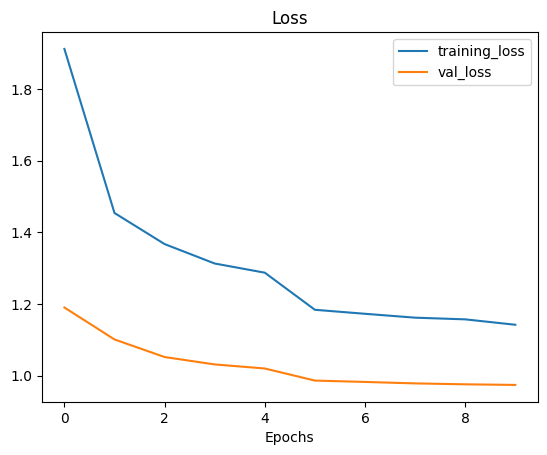

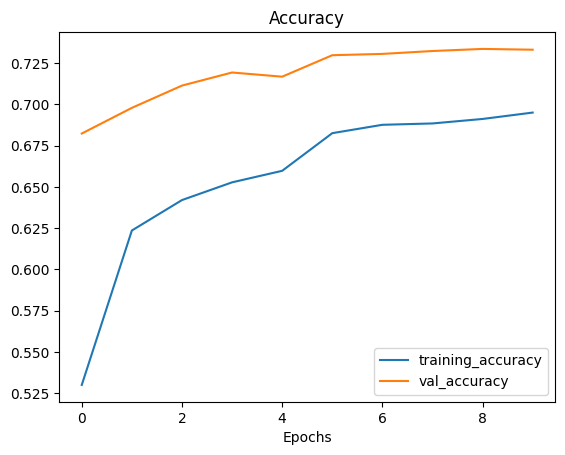

In [27]:
plot_loss_curves(history)

In [28]:
model.evaluate(test_data)

789/790 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7335 - loss: 0.9761

I0000 00:00:1753523900.990648   39923 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_2874', 144 bytes spill stores, 144 bytes spill loads



790/790 ━━━━━━━━━━━━━━━━━━━━ 54s 68ms/step - accuracy: 0.7335 - loss: 0.9761


[0.9826492071151733, 0.7301782369613647]

In [29]:
model.save("models/model.hdf5")

In [30]:
model.save_weights("weights/FinalModel.weights.h5")

## **Evaluating our Model**

In [31]:
pred_probs = model.predict(test_data, verbose=1)
len(pred_probs), pred_probs.shape

790/790 ━━━━━━━━━━━━━━━━━━━━ 55s 64ms/step


(25250, (25250, 101))

In [32]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10], len(pred_classes), pred_classes.shape

(array([29, 81, 91, 53, 97, 97, 10, 31,  3, 94]), 25250, (25250,))

In [33]:
# Getting true labels for the test_data

y_labels = []
test_images = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy())
y_labels[:10]

2025-07-26 15:29:31.272648: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


[29, 81, 91, 53, 97, 97, 10, 31, 3, 100]

In [34]:
# Predicted Labels vs. True Labels
pred_classes==y_labels

array([ True,  True,  True, ..., False,  True,  True])

### **Sklearn's Accuracy Score**

In [35]:
from sklearn.metrics import accuracy_score

sklearn_acc = accuracy_score(y_labels, pred_classes)
sklearn_acc 

0.7301782178217822

### **Confusion Matrix**
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known

In [36]:
cm = tf.math.confusion_matrix(y_labels, pred_classes)

plt.figure(figsize = (200, 200));
sn.heatmap(cm, annot=True, 
           fmt='',
           cmap='Blues');

### **Model's Class-wise Accuracy Score**

In [37]:
from sklearn.metrics import classification_report
report = (classification_report(y_labels, pred_classes, output_dict=True))

In [38]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in report.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.4630071599045346,
 'baby_back_ribs': 0.7142857142857143,
 'baklava': 0.7470355731225297,
 'beef_carpaccio': 0.737037037037037,
 'beef_tartare': 0.6307053941908713,
 'beet_salad': 0.5645161290322581,
 'beignets': 0.8286852589641435,
 'bibimbap': 0.8415094339622642,
 'bread_pudding': 0.5009140767824497,
 'breakfast_burrito': 0.6843177189409368,
 'bruschetta': 0.610655737704918,
 'caesar_salad': 0.7412844036697248,
 'cannoli': 0.7845528455284553,
 'caprese_salad': 0.6980392156862745,
 'carrot_cake': 0.702928870292887,
 'ceviche': 0.5078651685393258,
 'cheesecake': 0.5680473372781065,
 'cheese_plate': 0.7364016736401674,
 'chicken_curry': 0.6929460580912863,
 'chicken_quesadilla': 0.7611650485436893,
 'chicken_wings': 0.8094302554027505,
 'chocolate_cake': 0.6294820717131474,
 'chocolate_mousse': 0.5148936170212766,
 'churros': 0.8213552361396304,
 'clam_chowder': 0.833976833976834,
 'club_sandwich': 0.793168880455408,
 'crab_cakes': 0.5799256505576208,
 'creme_brulee': 0.8

In [39]:
report_df = pd.DataFrame(class_f1_scores, index = ['f1-scores']).T

In [40]:
report_df = report_df.sort_values("f1-scores", ascending=True)

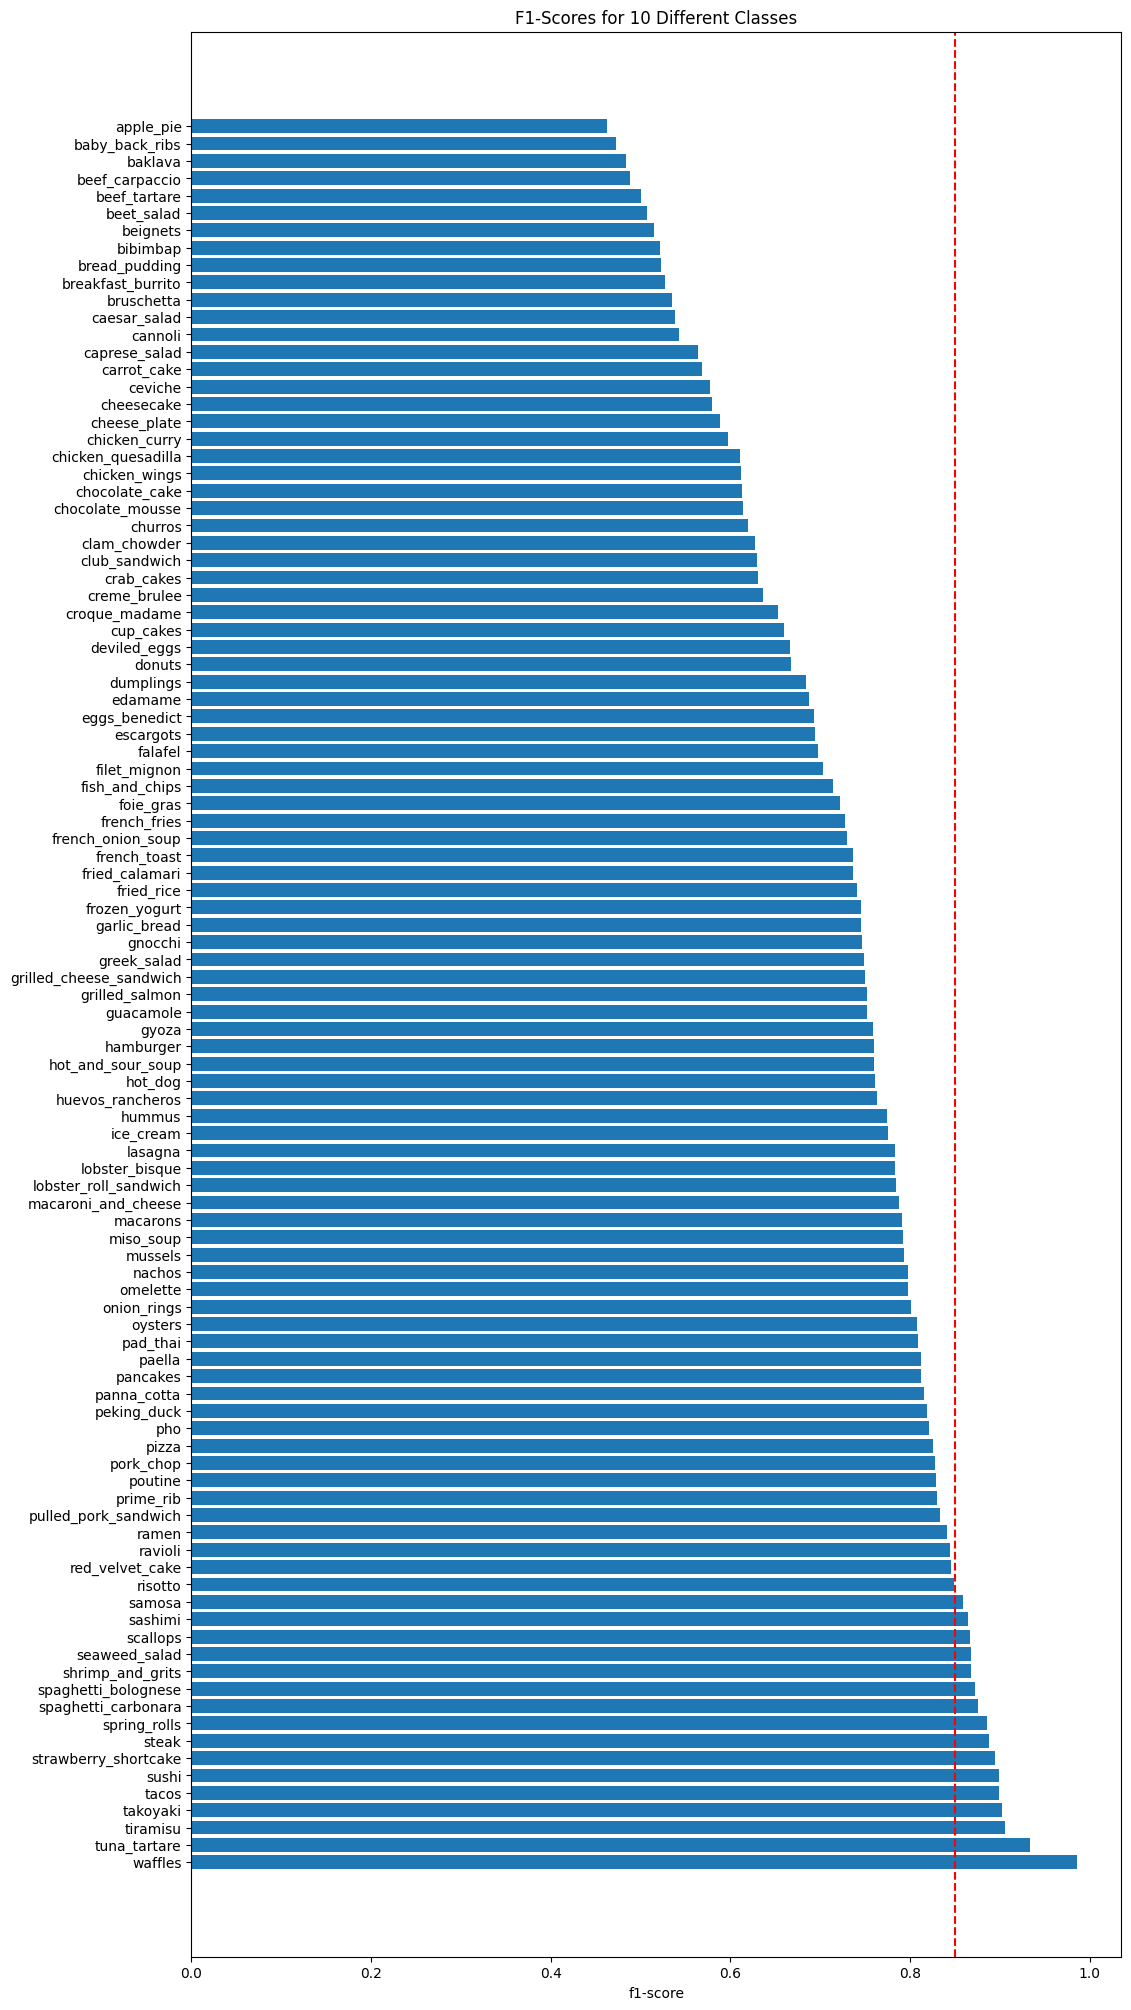

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(report_df)), report_df["f1-scores"].values)
ax.set_yticks(range(len(report_df)))
plt.axvline(x=0.85, linestyle='--', color='r')
ax.set_yticklabels(class_names)
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

### **Predicting on our own Custom images**

Once we have our model ready, its cruicial to evaluate it on our custom data : the data our model has never seen.

Training and evaluating a model on train and test data is cool, but making predictions on our own realtime images is another level.



In [42]:
# Get custom food images filepaths
import os

custom_food_images = ["custom_food_images/" + img_path for img_path in os.listdir("custom_food_images/")]
custom_food_images

['custom_food_images/hamburger.jpeg',
 'custom_food_images/steak.jpeg',
 'custom_food_images/sushi.jpeg',
 'custom_food_images/chicken_wings.jpeg',
 'custom_food_images/ramen.jpeg',
 'custom_food_images/pizza-dad.jpeg']

In [43]:
def pred_plot_custom(folder_path):
    import os
    import matplotlib.pyplot as plt
    
    custom_food_images = [
        folder_path + img_path
        for img_path in os.listdir(folder_path)
        if img_path.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))
    ]
    
    i = 0
    fig, a = plt.subplots(len(custom_food_images), 2, figsize=(15, 5 * len(custom_food_images)))
    
    for img_path in custom_food_images:
        img = load_and_prep_image(img_path, scale=False)
        
        if img is None:  # Skip invalid images
            print(f"Skipping invalid image: {img_path}")
            continue
        
        pred_prob = model.predict(tf.expand_dims(img, axis=0))
        pred_class = class_names[pred_prob.argmax()]
        top_5_i = pred_prob[0].argsort()[-5:][::-1]
        values = pred_prob[0][top_5_i]
        labels = [class_names[i] for i in top_5_i]

        # Plotting Image
        a[i][0].imshow(img / 255.0)
        a[i][0].set_title(f"Prediction: {pred_class}   Probability: {pred_prob.max():.2f}")
        a[i][0].axis(False)

        # Plotting Models Top 5 Predictions
        a[i][1].bar(labels, values, color='orange')
        a[i][1].set_title('Top 5 Predictions')
        
        i += 1
    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


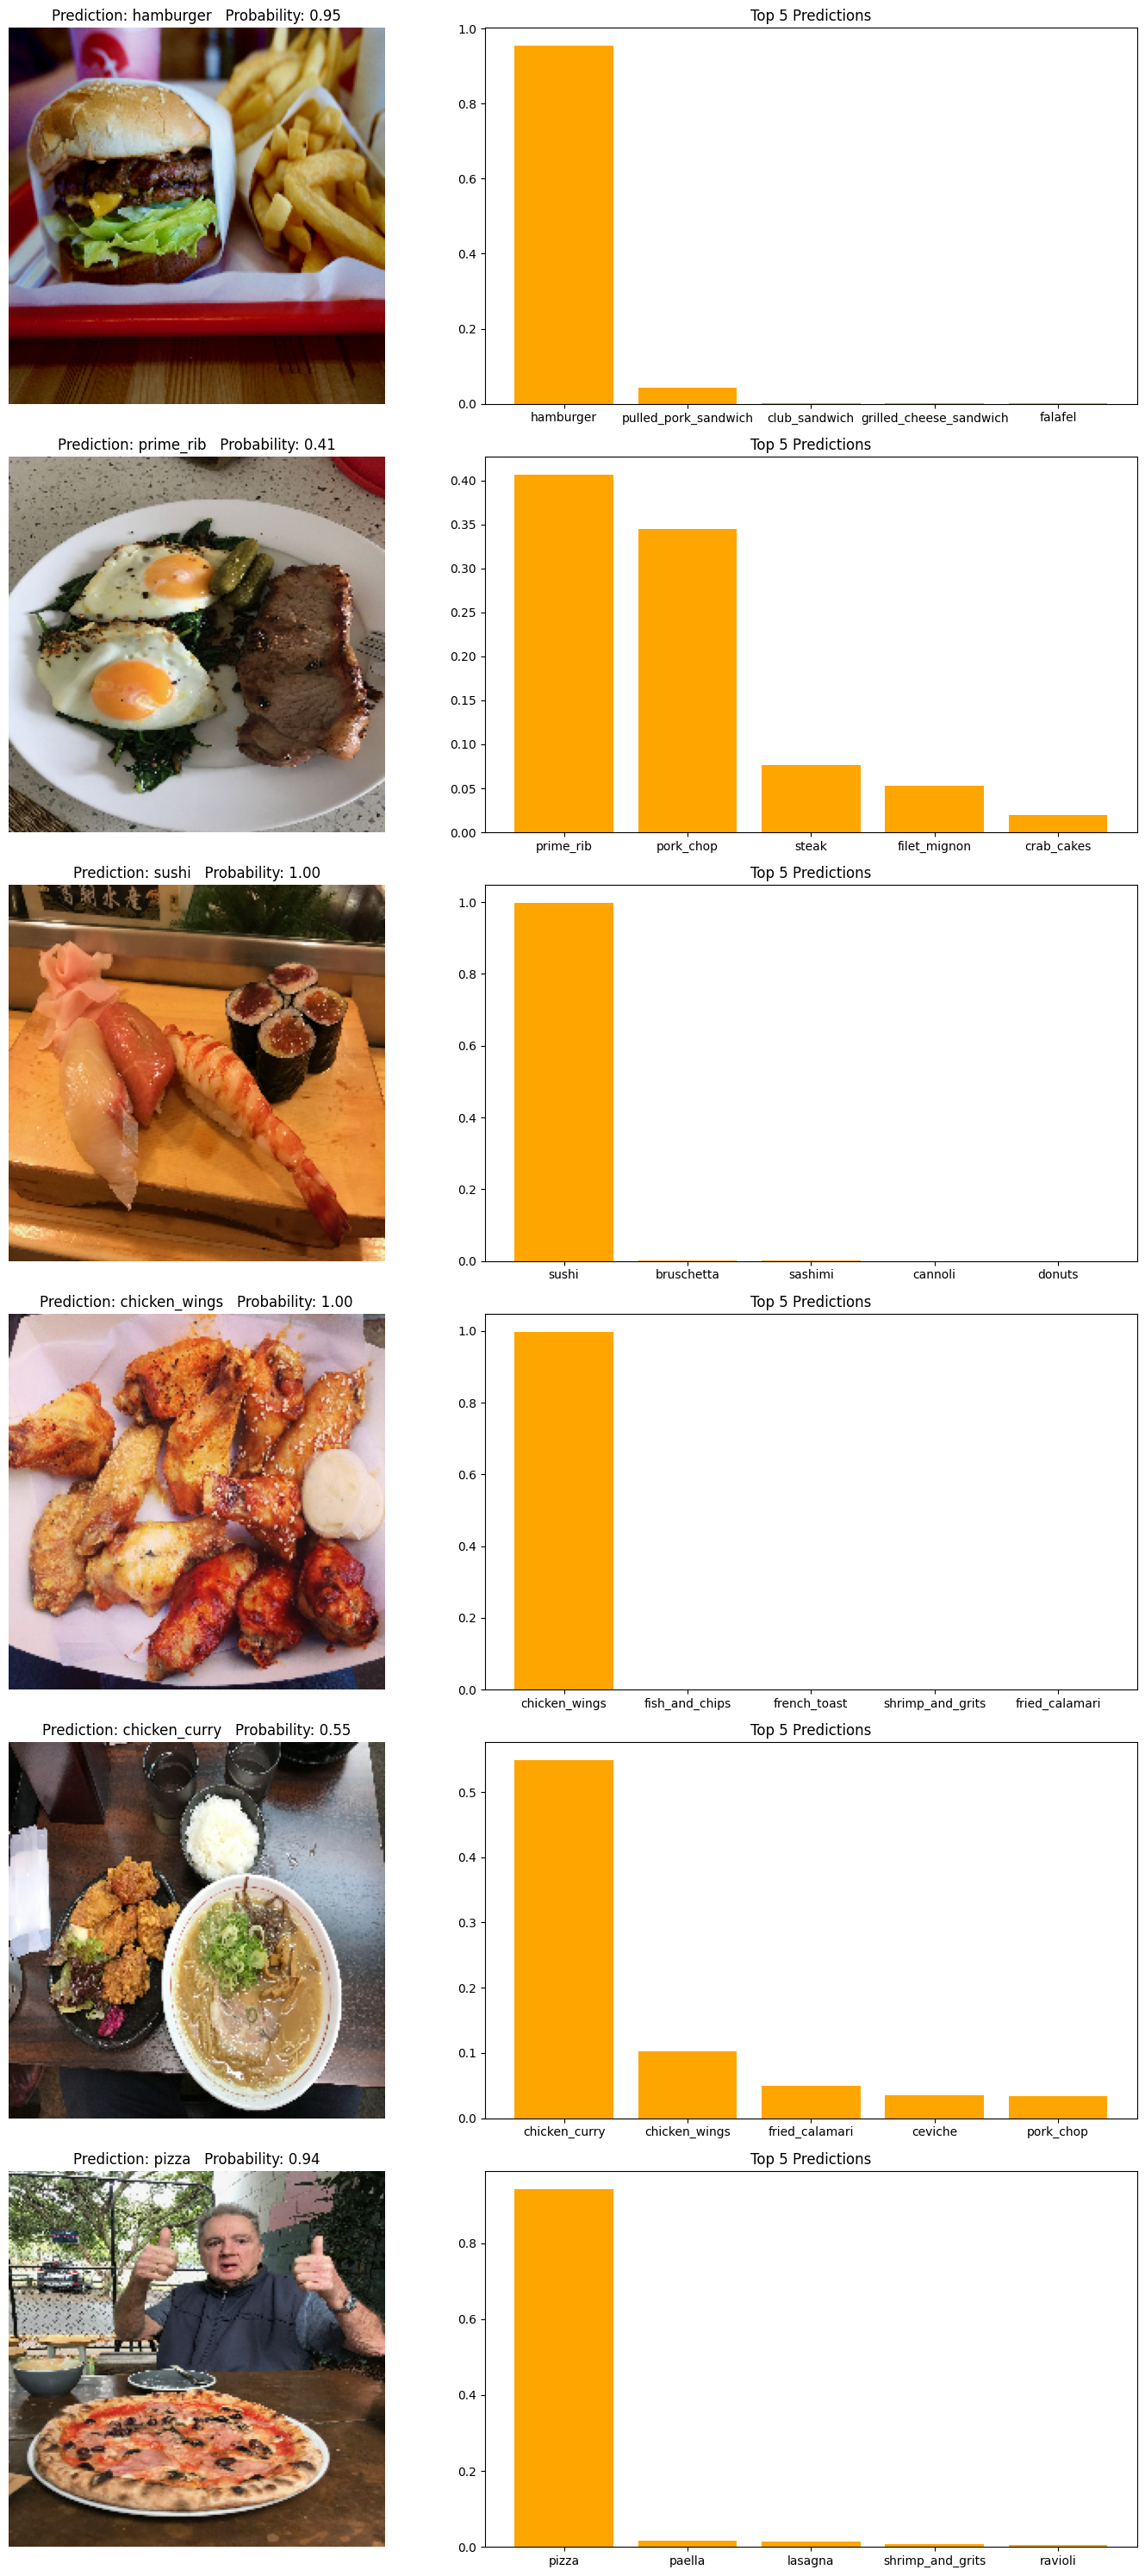

In [44]:
pred_plot_custom("custom_food_images/")